In [0]:
#importing pandas pytohn's data handeling library
import pandas as pd
import warnings
warnings.simplefilter('ignore')

# Working with large datasets
* You have learned somewhat about python and pandas on small datasets, but in real scenarios datasetsare huge around lakhs of rows and multiple columns.
* You are now ready to gear up and work with large datasets.
* The data set which we are working with is a <b>Weather dataset of london city of the year 2014</b>
## Happy Learning.. 

In [3]:
df = pd.read_csv('London_2014.csv')
df.head()

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,Mean Sea Level PressurehPa,Min Sea Level PressurehPa,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees<br />
0,2014-1-1,11,8,6,9,7,4,94,86,73,1002,993,984,31,11,2,40,26,66.0,9.91,4.0,Rain,186<br />
1,2014-1-2,11,9,6,9,6,4,94,81,60,998,993,985,31,15,5,32,21,50.0,1.02,2.0,Rain,214<br />
2,2014-1-3,11,8,6,9,5,2,94,76,54,1000,994,991,31,12,0,50,29,69.0,7.11,2.0,Rain-Thunderstorm,219<br />
3,2014-1-4,9,6,3,8,6,2,93,85,65,1001,993,987,31,12,5,35,21,39.0,9.91,4.0,Rain,211<br />
4,2014-1-5,12,7,1,11,4,-1,100,88,77,1004,1000,993,31,14,5,35,16,NaN,0.25,5.0,Rain,199<br />
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2014-12-27,4,3,2,8,1,-1,93,83,64,1015,1008,999,31,13,9,42,26,61.0,0.00,4.0,Rain,330<br />
361,2014-12-28,6,2,-2,1,-2,-3,100,76,45,1039,1030,1015,31,17,8,16,11,NaN,0.00,1.0,NaN,5<br />
362,2014-12-29,6,1,-4,2,-1,-4,100,87,62,1043,1041,1038,24,10,5,13,8,NaN,0.25,1.0,NaN,289<br />
363,2014-12-30,6,1,-4,2,-1,-4,100,90,68,1042,1039,1036,27,9,3,14,6,NaN,0.25,3.0,NaN,258<br />


# Removing Rouge Spaces
* What are rouge spaces?
 * This are the spaces before or after column names.
 * When you open this dataset in text file, you will notice that columns "Max humidity, Mean humidity", you will notice a space before Mean humidity name.
 * Data frame understands this as df[' Mean humidity'], thus every time you have to add space.
* We will try to remove this rouge space from the dataframe for all the columns.

In [7]:
#let's check the problem
df['Mean Humidity'] 
#This will show a name error as the real value is df[' Mean humidity']

KeyError: ignored

In [0]:
#creating a new dataframe london to store the removed the rouged space
london = pd.read_csv('London_2014.csv', skipinitialspace = True)

In [8]:
#Now let's try the same code.
london['Mean Humidity'] #yaaay! it works.

0      86
1      81
2      76
3      85
4      88
       ..
360    83
361    76
362    87
363    90
364    89
Name: Mean Humidity, Length: 365, dtype: int64

# Removing extra characters
* The column 'WindDirDegress ' has an extra space character in csv beacuse html added an new line just after it while loading the data.
* Checkout how we can remove extra characters.

In [16]:
# Renaming the column in dataframe
london = london.rename(columns={'WindDirDegrees<br />':'WindDirDegrees'})
london.columns

Index(['GMT', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC',
       'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity',
       'Mean Humidity', 'Min Humidity', 'Max Sea Level PressurehPa',
       'Mean Sea Level PressurehPa', 'Min Sea Level PressurehPa',
       'Max VisibilityKm', 'Mean VisibilityKm', 'Min VisibilitykM',
       'Max Wind SpeedKm/h', 'Mean Wind SpeedKm/h', 'Max Gust SpeedKm/h',
       'Precipitationmm', 'CloudCover', 'Events', 'WindDirDegrees'],
      dtype='object')

In [18]:
# Getting rid of all the extra spaces after the datav alue of this column.
london['WindDirDegrees'] = london['WindDirDegrees'].str.rstrip('<br />') 
#This will strip out all the spaces from every value in the column.
london['WindDirDegrees'].head()

0    186
1    214
2    219
3    211
4    199
Name: WindDirDegrees, dtype: object

# Dealing with missing values
* Null values of rows are called missing values.
* Once you know how much and where data is missing, you have to decide what to do: ignore those rows? Replace with a fixed value? Replace with a computed value, like the mean?
* what if the column is of Nan(Not a number) datatype, then only first two options are available.
* There are two functions/methods in pandas:
  * dropna(): This will delete all the rows where missing value is present.
  * fillna(): This will fill the missing values with the value passed as an argument.
* It is recommended to use fillna() for Nan and mean technique for number columns.
* pandas ignores the missing values while computing mean() etc. 

In [20]:
#Events data column consistes of days when no event is recorded thus the values is Nan.
#We replace all the missing values with empty string.
london['Events'] = london['Events'].fillna('')
london[london['Events'].isnull()] #This will return zero rows as there is no missing data.

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,Mean Sea Level PressurehPa,Min Sea Level PressurehPa,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees


# Working with Datatypes
* While reading datafrom csv datatype is often misunderstood.
* Therefore checking and converting the datatype of all the columns is necessary before analysis.
* In pandas: 
 * int64: 55 to 2356
 * float64: 55.25 to 2356.00
 * object: pandas datatype for strings.

In [21]:
#Let's View the datatype of all columns
london.dtypes

GMT                            object
Max TemperatureC                int64
Mean TemperatureC               int64
Min TemperatureC                int64
Dew PointC                      int64
MeanDew PointC                  int64
Min DewpointC                   int64
Max Humidity                    int64
Mean Humidity                   int64
Min Humidity                    int64
Max Sea Level PressurehPa       int64
Mean Sea Level PressurehPa      int64
Min Sea Level PressurehPa       int64
Max VisibilityKm                int64
Mean VisibilityKm               int64
Min VisibilitykM                int64
Max Wind SpeedKm/h              int64
Mean Wind SpeedKm/h             int64
Max Gust SpeedKm/h            float64
Precipitationmm               float64
CloudCover                    float64
Events                         object
WindDirDegrees                 object
dtype: object

In [26]:
# now here WindDirDegrees is of object datatype, so if want to view rows with 350 degrees then 
# we need to convert the datatype from object type to int64
london['WindDirDegrees'] =  london['WindDirDegrees'].astype('int64')
london['WindDirDegrees'].dtypes

dtype('int64')

In [28]:
# Now let's convert GMT from string to Datetime
london['GMT'] = pd.to_datetime(london['GMT'])
london['GMT'].dtypes

dtype('<M8[ns]')

In [31]:
#Now let's check
london[london['WindDirDegrees'] > 320]

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,Mean Sea Level PressurehPa,Min Sea Level PressurehPa,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
19,2014-01-20,9,4,1,5,3,0,100,86,60,1012,1008,1002,21,10,2,8,3,NaN,0.25,2.0,Fog,342
100,2014-04-11,16,12,9,5,4,2,71,53,28,1023,1021,1020,31,18,10,13,8,NaN,0.00,1.0,,351
103,2014-04-14,16,11,6,5,3,0,87,57,25,1028,1024,1022,31,17,10,21,13,NaN,0.00,1.0,,330
110,2014-04-21,19,12,5,11,8,4,100,78,31,1007,1005,1004,26,7,0,14,6,NaN,9.91,3.0,Fog-Rain-Thunderstorm,356
114,2014-04-25,12,10,8,11,9,7,100,91,77,1016,1012,1009,19,7,3,26,10,NaN,6.10,6.0,Rain,329
133,2014-05-14,19,13,6,8,6,2,93,60,24,1034,1031,1027,31,17,10,16,10,NaN,0.00,2.0,,325
145,2014-05-26,12,11,9,11,9,5,94,84,53,1021,1019,1016,31,12,3,13,6,NaN,7.11,3.0,Rain,343
146,2014-05-27,13,12,10,12,10,8,94,87,74,1016,1014,1013,26,10,3,16,11,NaN,0.51,6.0,Rain,323
163,2014-06-13,26,19,13,13,11,9,82,52,27,1027,1025,1022,31,19,10,16,10,NaN,0.00,2.0,,339
174,2014-06-24,24,19,13,15,12,9,94,66,27,1021,1019,1017,31,12,0,23,8,37.0,0.00,3.0,Fog,350


In [55]:
#now whilw using GMT we need to provide date in datetime64 format.
london[london['GMT'] == pd.datetime(2014, 11, 9)] 

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,Mean Sea Level PressurehPa,Min Sea Level PressurehPa,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
GMT,,,,,,,,,,,,,,,,,,,,,,,
2014-11-09,2014-11-09,13,10,6,9,7,4,100,83,47,1005,1003,1001,31,11,0,14,6,32.0,0.0,2.0,Fog,212


In [38]:
#Exercise -1
#Find the Mean temperature on 10-May 2014.
london[london['GMT'] == pd.datetime(2014, 5, 10)]['Mean TemperatureC']

129    14
Name: Mean TemperatureC, dtype: int64

# Plotting the charts 
* Plotting makesthe visualization and understanding of data simpler.
* We are going to use pandas's plot function.
* Before using this we need to tell jupyter to display the chart after every call to plot().

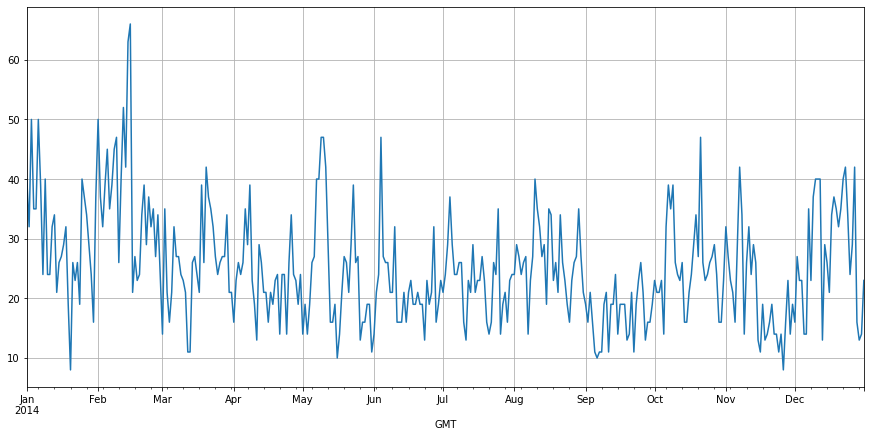

In [62]:
london['Max Wind SpeedKm/h'].plot(grid = True, figsize = (15,7))
# The X-axis the dataframe's index from 0 to 364
# The y axis th ewind speed in km/h
# The figsize parameter tells plot to be 10 units long and 7 units high for better visualization. 

In [0]:
# Changing the dataframe's index to GMT which would result in better understanding of graph.
london.index = london['GMT']

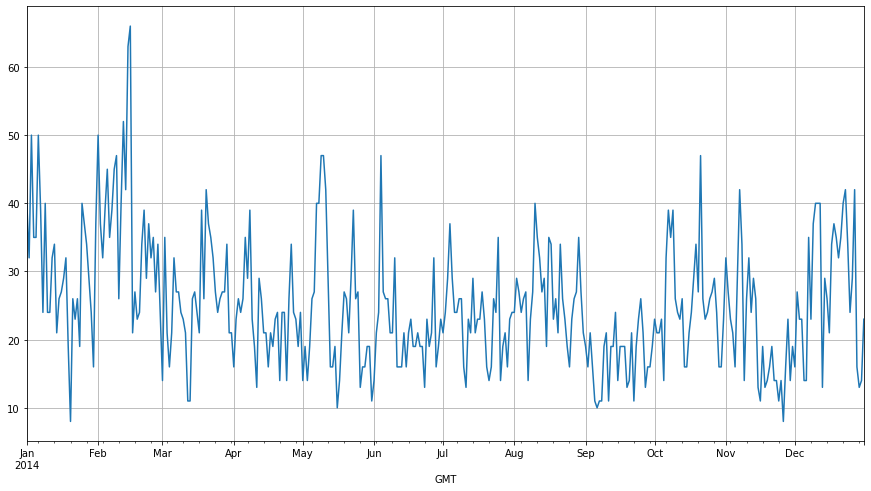

In [50]:
# now let's see the change on the x-axis
london['Max Wind SpeedKm/h'].plot(grid=True, figsize=(15,8))

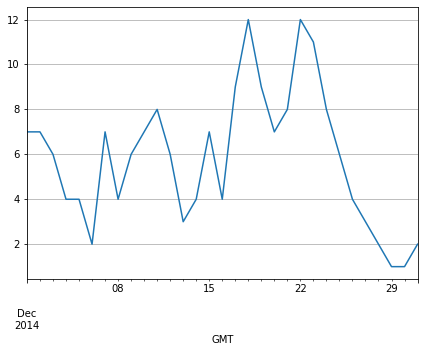

In [60]:
# Now let's plot the mean temperature in the month of december.
#use loc for column specific location and not iloc
london.loc[pd.datetime(2014, 12, 1) : pd.datetime(2014, 12, 31)]['Mean TemperatureC'].plot(grid=True, figsize=(7,5))

# The Project
* You need to find the best two week for holiday in london.
* Do not forget this steps of loading csv, cleaning data, and then visualizing.